In [1]:
from process import *
from visualize import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
import os
import warnings
warnings.filterwarnings("ignore")

# How many files from glycoshape are already compatible with glycontact?

In [80]:
#Get all IUPAC from glycoshape and test conversion
#Report all cases that fail/succeed
iupac_list = get_glycoshape_IUPAC()
print(len(iupac_list))
g_list = iupac_list
success_fail_list = []
x = 1
for g_index in range(0,len(iupac_list)) :
    print(x)
    pdb_path = 'glycans_pdb'
    pdbs = check_available_pdb(pdb_path + '/' + iupac_list[g_index])
    success = True 
    pdb_error = ''
    monosac_error = ''
    explore_threshold_error = ''

    #Ensure that at least one pdb file has been downloaded for each glycan
    try :
        pdb_file = pdb_path + '/' + iupac_list[g_index] + "/" + pdbs[0]
    except :
        df = pd.DataFrame()
        pdb_error = 'pdb'

    #Apply PDB->IUPAC conversion, else, assume that it is because of an unexpected monosaccharide
    try :
        df = explore_threshold(pdb_file, iupac_list[g_index], threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
    except :
        df = pd.DataFrame()
        monosac_error = 'UnexpectedMonosaccharide'
    
    #Ensure the production of a converted df. 
    try : 
        print(df['atom_number'][0])
    except :
        success = False
        explore_threshold_error = 'CannotBuild'

    errors = pdb_error + '_' + monosac_error + '_' + explore_threshold_error
    
    if errors == '__' :
        errors = 'SUCCESS'
    
    success_fail_list.append(errors)
    x +=1

fdf = pd.DataFrame()
fdf['glycan'] = g_list
fdf['success'] = success_fail_list    

445
1
threshold:2.4
['GlcNAc(b1-2)', 'GlcNAc(b1-6)', 'Gal(b1-4)', 'Neu5Ac(a2-3)', 'Man(b1-4)', 'Man(a1-3)', 'GlcNAc(b1-4)', 'GlcNAc(b1-4)', 'Man(a1-6)']
{'1_ROH': '-R', '2_NAG': 'GlcNAc(b1-1)', '3_NAG': 'GlcNAc(b1-4)', '4_BMA': 'Man(b1-4)', '6_NAG': 'GlcNAc(b1-6)', '7_GAL': 'Gal(b1-4)', '8_SIA': 'Neu5Ac(a2-3)', '9_NAG': 'GlcNAc(b1-2)', '10_GAL': 'Gal(b1-4)', '11_SIA': 'Neu5Ac(a2-3)', '12_MAN': 'Man(a1-3)', '13_NAG': 'GlcNAc(b1-4)', '17_GAL': 'Gal(b1-4)', '18_SIA': 'Neu5Ac(a2-3)'}
{'2_NAG': ['2_(b1-1)'], '2_(b1-1)': ['1_ROH'], '3_NAG': ['3_(b1-4)'], '3_(b1-4)': ['2_NAG'], '4_BMA': ['4_(b1-4)'], '4_(b1-4)': ['3_NAG'], '6_NAG': ['6_(b1-6)'], '6_(b1-6)': ['5_MAN'], '7_GAL': ['7_(b1-4)'], '7_(b1-4)': ['6_NAG'], '8_SIA': ['8_(a2-3)'], '8_(a2-3)': ['7_GAL'], '9_NAG': ['9_(b1-2)'], '9_(b1-2)': ['5_MAN'], '10_GAL': ['10_(b1-4)'], '10_(b1-4)': ['9_NAG'], '11_SIA': ['11_(a2-3)'], '11_(a2-3)': ['10_GAL'], '12_MAN': ['12_(a1-3)'], '12_(a1-3)': ['4_BMA'], '13_NAG': ['13_(b1-4)'], '13_(b1-4)': ['12_M

In [81]:
success_df = fdf[fdf['success']=='SUCCESS']

In [82]:
success_df #178 -> 274 --> 314 --> 364

glycan  success
0    Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...  SUCCESS
1    Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...  SUCCESS
2                                   GlcNAc(b1-6)GalNAc  SUCCESS
3    Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNA...  SUCCESS
4                          Neu5Ac(a2-3)Gal(b1-3)GalNAc  SUCCESS
..                                                 ...      ...
440      Neu5Ac(a2-3)Gal(b1-3)GlcNAc(a1-3)Gal(b1-4)Glc  SUCCESS
441  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...  SUCCESS
442  Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...  SUCCESS
443  Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b...  SUCCESS
444  Gal(a1-3)[Fuc(a1-2)]Gal(b1-3)GalNAc(b1-3)Gal(a...  SUCCESS

[364 rows x 2 columns]

In [83]:
unsuccess_df = fdf[fdf['success']!='SUCCESS']

In [84]:
unsuccess_df #256 --> 171 --> 131 --> 81

glycan  \
21   Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...   
22             GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS   
26   Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal...   
34                GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc   
37   Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...   
..                                                 ...   
396  Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...   
400  GalNAc(b1-4)[Fuc(a1-3)]GlcNAc6Pc(b1-2)Man(a1-3...   
406  Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Fuc(...   
417          Xyl(b1-2)[Man(a1-3)]Man(a1-4)Gal(b1-6)Man   
439             GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS   

                                   success  
21                           __CannotBuild  
22   _UnexpectedMonosaccharide_CannotBuild  
26                           __CannotBuild  
34   _UnexpectedMonosaccharide_CannotBuild  
37                           __CannotBuild  
..                                     ...  
396  _UnexpectedMonosaccharide_CannotBuild  
400                          __CannotBuild  
406                       pdb__CannotBuild  
417                       pdb__CannotBuild  
439  _UnexpectedMonosaccharide_CannotBuild  

[81 rows x 2 columns]

In [87]:
unsuccess_df[unsuccess_df['success']=='__CannotBuild'] #235 --> 142 --> 102 --> 52

52


In [89]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list()
for u in ulist:
    print(u)

Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl
Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc
GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b

In [88]:
unsuccess_df[unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'] #20 -> 22 -> 22

glycan  \
22             GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS   
34                GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc   
81   Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideo...   
86   GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S...   
118                            GalA(a1-4)GlcA(b1-4)Glc   
121          GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S   
147  IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a...   
187  GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)GlcA(b1-...   
217  Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Rha(a1-...   
218           GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S   
283                                IdoA2S(a1-4)GlcNS6S   
284      Man(a1-2)GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc   
290         Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)Glc   
293       IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S   
307  GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)Ido...   
310           GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS6S   
314  GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcN...   
326  GlcNS3S6S(a1-4)IdoA2S(a1-4)GlcNS3S6S(a1-4)GlcA...   
374  GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcN...   
384             GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNS6S   
396  Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...   
439             GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS   

                                   success  
22   _UnexpectedMonosaccharide_CannotBuild  
34   _UnexpectedMonosaccharide_CannotBuild  
81   _UnexpectedMonosaccharide_CannotBuild  
86   _UnexpectedMonosaccharide_CannotBuild  
118  _UnexpectedMonosaccharide_CannotBuild  
121  _UnexpectedMonosaccharide_CannotBuild  
147  _UnexpectedMonosaccharide_CannotBuild  
187  _UnexpectedMonosaccharide_CannotBuild  
217  _UnexpectedMonosaccharide_CannotBuild  
218  _UnexpectedMonosaccharide_CannotBuild  
283  _UnexpectedMonosaccharide_CannotBuild  
284  _UnexpectedMonosaccharide_CannotBuild  
290  _UnexpectedMonosaccharide_CannotBuild  
293  _UnexpectedMonosaccharide_CannotBuild  
307  _UnexpectedMonosaccharide_CannotBuild  
310  _UnexpectedMonosaccharide_CannotBuild  
314  _UnexpectedMonosaccharide_CannotBuild  
326  _UnexpectedMonosaccharide_CannotBuild  
374  _UnexpectedMonosaccharide_CannotBuild  
384  _UnexpectedMonosaccharide_CannotBuild  
396  _UnexpectedMonosaccharide_CannotBuild  
439  _UnexpectedMonosaccharide_CannotBuild

In [16]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list()
for u in ulist:
    print(u)

GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS
GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose
GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S
GalA(a1-4)GlcA(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc6S(a1-4)GlcA
Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha
GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S
Man(a1-2)GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)Glc
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS
GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc(a1-4)GlcA
GlcNS3S6

In [70]:
unsuccess_df[unsuccess_df['success']=='pdb__CannotBuild'] #1 --> 7 --> 7

glycan           success
134  Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal...  pdb__CannotBuild
318  GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)Gl...  pdb__CannotBuild
355  Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[G...  pdb__CannotBuild
360  Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[F...  pdb__CannotBuild
371  Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNA...  pdb__CannotBuild
406  Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Fuc(...  pdb__CannotBuild
417          Xyl(b1-2)[Man(a1-3)]Man(a1-4)Gal(b1-6)Man  pdb__CannotBuild

In [17]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list()
for u in ulist:
    print(u)

Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)]Gal(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc
Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-4)Glc
Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Xyl(b1-2)[Man(a1-3)]Man(a1-4)Gal(b1-6)Man


# From the successully built glycans, group them by identical silhouette
## silhouette = same shape with similar sugars occupying similar positions by with different linkage types

In [17]:
s_glycan = success_df['glycan'].to_list()
topo_groups = [] # groups of same topology/silhouette
nullified_list = []
group_list = []
for s in s_glycan :
    nullified = s.replace('Glc(','Hex(').replace('Gal(','Hex(').replace('Man(','Hex(').replace('GlcNAc(','HexNAc(').replace('GalNAc(','HexNAc(').replace('Neu5Ac(','Sia(').replace('Neu5Gc(','Sia(').replace('(a1-3)','').replace('(a1-2)','').replace('(a1-4)','').replace('(a1-5)','').replace('(a1-6)','').replace('(b1-2)','').replace('(b1-3)','').replace('(b1-4)','').replace('(b1-5)','').replace('(b1-6)','').replace('(a2-6)','').replace('(a2-3)','').replace('(a2-8)','').replace('Xyl','Pen').replace('GlcNAc','HexNAc')
    if nullified in topo_groups :
        group = topo_groups.index(nullified)
    else :
        topo_groups.append(nullified)
        group = topo_groups.index(nullified)
    nullified_list.append(nullified)
    group_list.append(group)

success_df['nullified']=nullified_list
success_df['topological_group']=group_list


In [25]:
success_df.sort_values(by ='topological_group')

glycan  success  \
0    Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...  SUCCESS   
5    Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man...  SUCCESS   
6    Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...  SUCCESS   
7    Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc...  SUCCESS   
165  Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...  SUCCESS   
..                                                 ...      ...   
423  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...  SUCCESS   
424  Glc(a1-2)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)M...  SUCCESS   
426  Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)Glc...  SUCCESS   
427             Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc  SUCCESS   
430  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...  SUCCESS   

                                             nullified  topological_group  
0    SiaHexHexNAc[SiaHexHexNAc]Hex[SiaHexHexNAc[Sia...                  0  
5               HexHexNAcHex[HexNAcHex]HexHexNAcHexNAc                  1  
6    HexHexNAcHex[HexHexNAc[HexNAc]Hex]HexHexNAcHexNAc                  2  
7    HexHexNAcHex[HexHexNAcHex][Pen]HexHexNAc[Fuc]H...                  3  
165  HexHexNAcHex[HexHexNAcHex][Pen]HexHexNAc[Fuc]H...                  3  
..                                                 ...                ...  
423  Fuc[Hex]HexNAc[HexNAc]Hex[Hex[Hex]Hex]HexHexNA...                135  
424  HexHexHexHexHexHex[HexHex[HexHex]Hex]HexHexNAc...                136  
426  SiaHexHexNAc[HexHexNAc]Hex[HexHexNAc[HexHexNAc...                137  
427                               HexHexNAc[Fuc]HexNAc                138  
430  Fuc[Hex]HexNAcHex[Fuc[Hex]HexNAcHex]HexHexNAc[...                139  

[178 rows x 4 columns]

In [28]:
from collections import Counter

#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(group_list)
print(c.most_common())

[(28, 6), (38, 5), (54, 5), (12, 4), (3, 3), (5, 3), (4, 2), (7, 2), (8, 2), (14, 2), (21, 2), (22, 2), (67, 2), (77, 2), (83, 2), (92, 2), (94, 2), (95, 2), (104, 2), (107, 2), (110, 2), (112, 2), (125, 2), (129, 2), (0, 1), (1, 1), (2, 1), (6, 1), (9, 1), (10, 1), (11, 1), (13, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (93, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (105, 1),

In [356]:
success_df['glycan'][success_df['topological_group']==54].to_list()

['Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc']

In [339]:
g = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
pdbs = check_available_pdb(g)

# Building distance tables and other metrics per glycan groups

In [340]:
#alpha
### Monosaccharide contact maps from alpha linked molecules
# Select alpha-linked glycan pdb files
alpha_pdbs = [pdb for pdb in pdbs if 'alpha' in pdb]


# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df = explore_threshold(f.split('_')[0]+'/'+ f, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    atom_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)
    dfs.append(dist_table)
    atom_dfs.append(atom_dist_table)

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(dfs, 'amplify')
isvt = inter_structure_variability_table(dfs)

atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
atom_isvt = inter_structure_variability_table(atom_dfs)

threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.6
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glyc

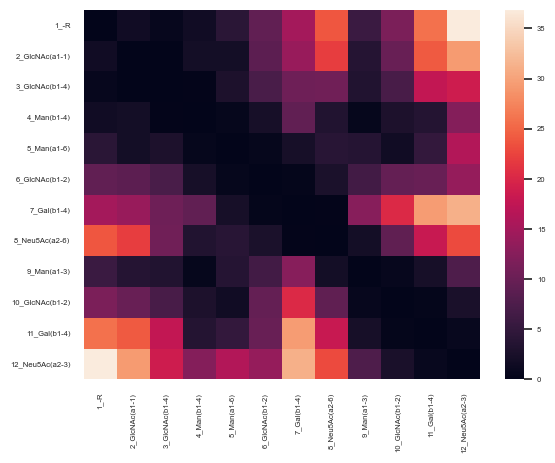

In [341]:
monosaccharide_contact_map(isvt)

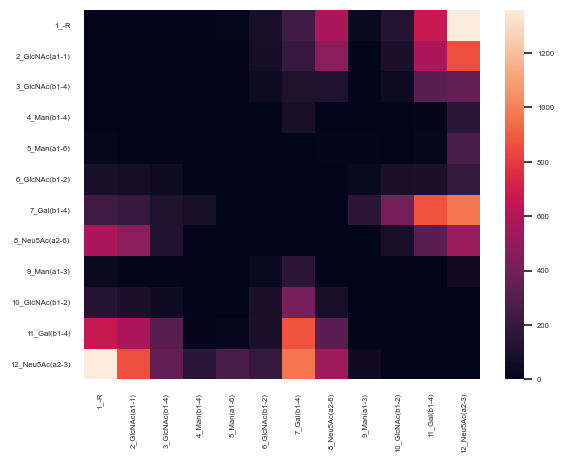

In [342]:
monosaccharide_contact_map(isvt_amplified)

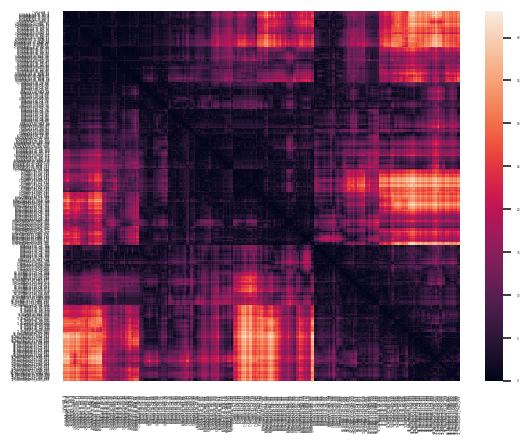

In [343]:
atom_contact_map(atom_isvt,size =0.2)

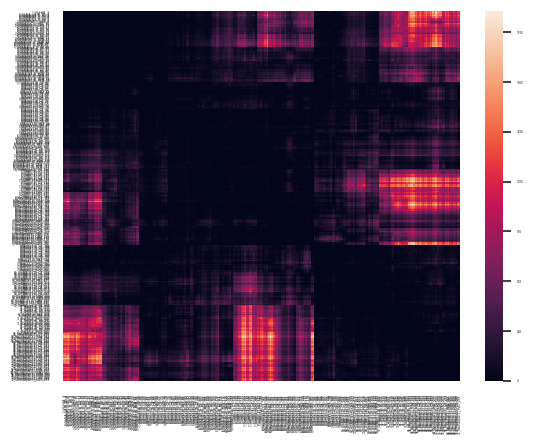

In [344]:
atom_contact_map(atom_isvt_amplified,size =0.2)

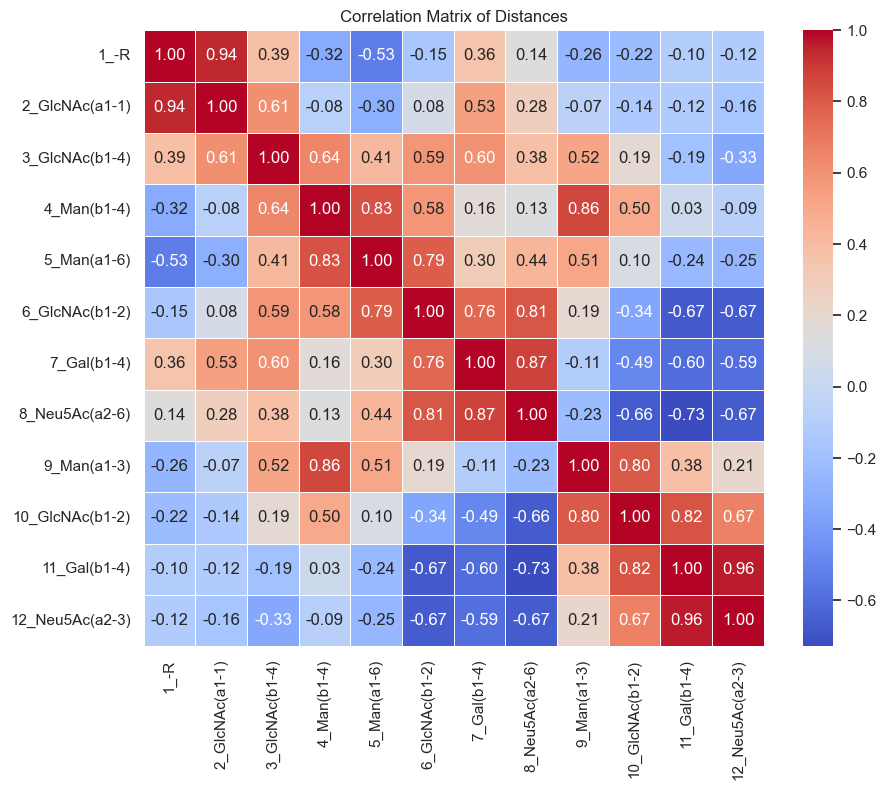

In [345]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

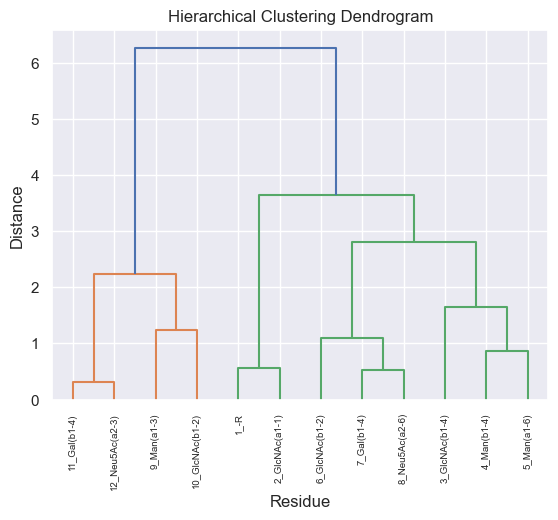

In [346]:
show_correlation_dendrogram(mx, font_size = 7)

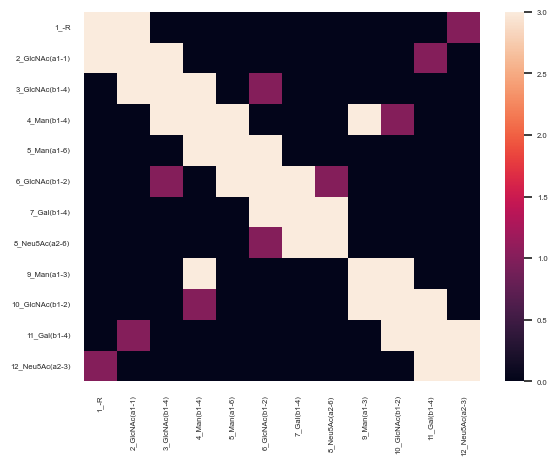

In [347]:
isft = inter_structure_frequency_table(dfs, threshold = 3)
monosaccharide_contact_map(isft)

In [348]:
#beta
alpha_pdbs = [pdb for pdb in pdbs if 'beta' in pdb]


# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df = explore_threshold(f.split('_')[0]+'/'+ f, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    atom_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)
    dfs.append(dist_table)
    atom_dfs.append(atom_dist_table)

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(dfs, 'amplify')
isvt = inter_structure_variability_table(dfs)

atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
atom_isvt = inter_structure_variability_table(atom_dfs)

threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.6
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detec

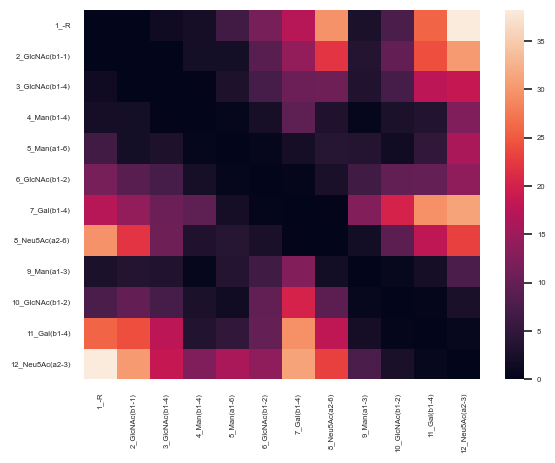

In [349]:
monosaccharide_contact_map(isvt)

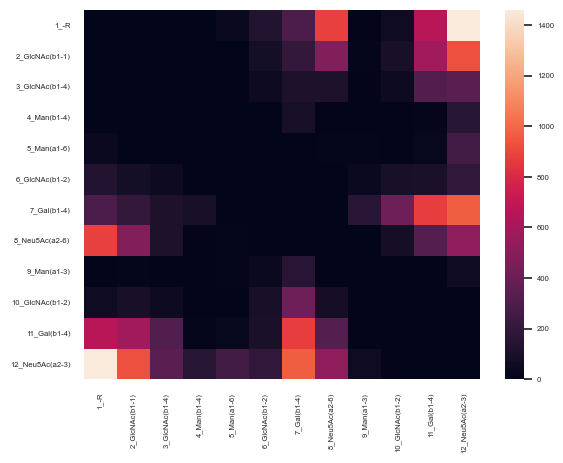

In [350]:
monosaccharide_contact_map(isvt_amplified)

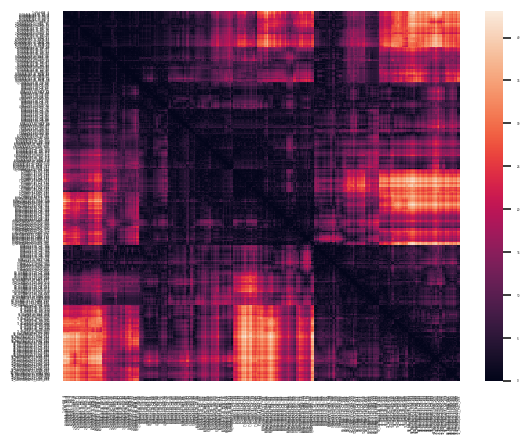

In [351]:
atom_contact_map(atom_isvt,size =0.2)

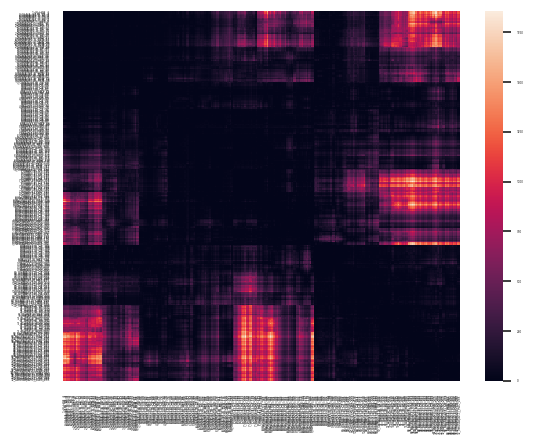

In [352]:
atom_contact_map(atom_isvt_amplified,size =0.2)

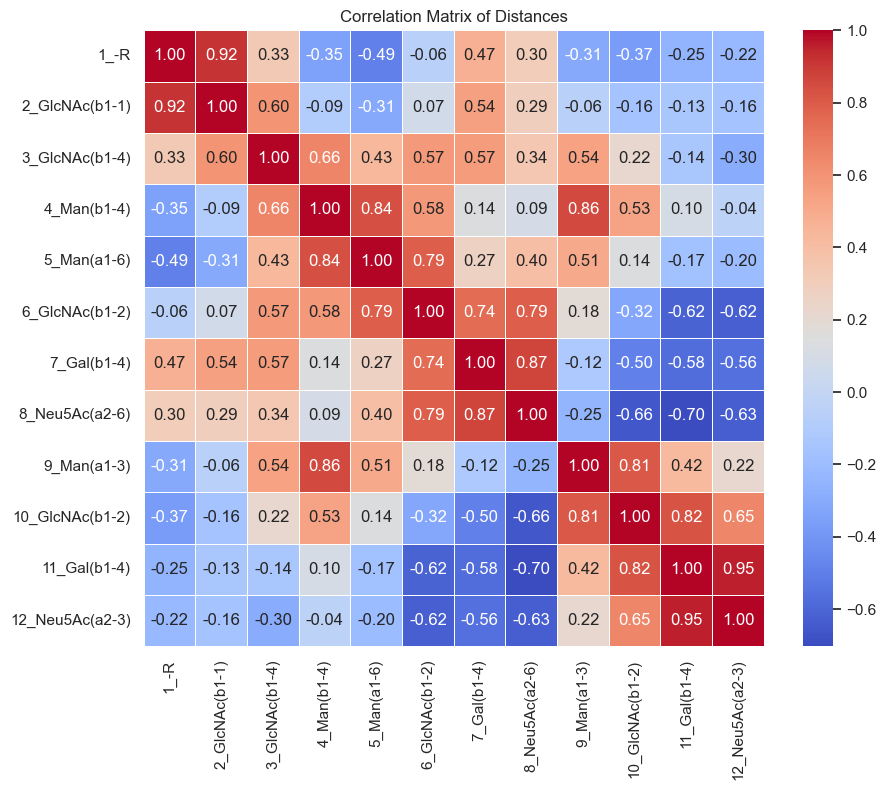

In [353]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

icoord[[5.0, 5.0, 15.0, 15.0], [25.0, 25.0, 35.0, 35.0], [10.0, 10.0, 30.0, 30.0], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [75.0, 75.0, 85.0, 85.0], [105.0, 105.0, 115.0, 115.0], [95.0, 95.0, 110.0, 110.0], [80.0, 80.0, 102.5, 102.5], [52.5, 52.5, 91.25, 91.25], [20.0, 20.0, 71.875, 71.875]]
dcoord[[0.0, 0.3519416794629673, 0.3519416794629673, 0.0], [0.0, 1.1610984776089903, 1.1610984776089903, 0.0], [0.3519416794629673, 2.1361069135333364, 2.1361069135333364, 1.1610984776089903], [0.0, 0.836604080652352, 0.836604080652352, 0.0], [0.0, 1.6102005407082811, 1.6102005407082811, 0.836604080652352], [0.0, 0.5742767875691475, 0.5742767875691475, 0.0], [0.0, 0.5115660362138514, 0.5115660362138514, 0.0], [0.0, 1.1948703669774987, 1.1948703669774987, 0.5115660362138514], [0.5742767875691475, 2.9349060250640373, 2.9349060250640373, 1.1948703669774987], [1.6102005407082811, 3.527548381072158, 3.527548381072158, 2.9349060250640373], [2.1361069135333364, 6.251517134752633, 6.25151713475

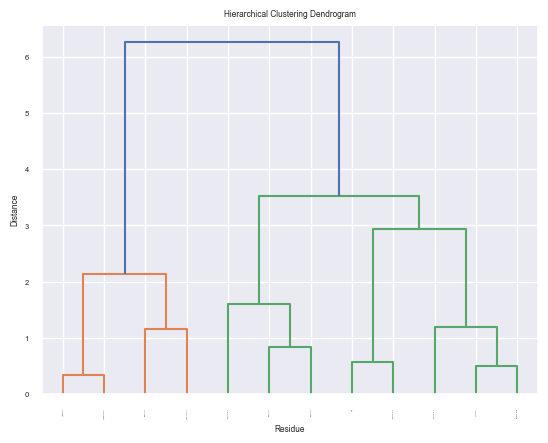

{'C1': ['11_Gal(b1-4)', '12_Neu5Ac(a2-3)', '9_Man(a1-3)', '10_GlcNAc(b1-2)'],
 'C2': ['3_GlcNAc(b1-4)',
  '4_Man(b1-4)',
  '5_Man(a1-6)',
  '1_-R',
  '2_GlcNAc(b1-1)',
  '6_GlcNAc(b1-2)',
  '7_Gal(b1-4)',
  '8_Neu5Ac(a2-6)']}

In [362]:
def show_correlation_dendrogram(corr_df, font_size = 1):
    ### Create a hierarchical clustering dendrogram from a correlation matrix as dataframe (corr_df)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    dendrogram = hierarchy.dendrogram(hierarchy.linkage(corr_df.values, method='ward'),
                                    labels=corr_df.columns,
                                    leaf_rotation=90,
                                    leaf_font_size=8,ax=ax
                                    )
    for d in dendrogram :
        print(d + str(dendrogram[d]))
    monolist = dendrogram['ivl']
    clustlist = dendrogram['leaves_color_list']
    uniclustlist =list(set(clustlist))
    res_dict = {}
    #Create a dict with the correlated clusters (=colors on dendrogram) --> 3D regions of glycans highly correlated 
    for c in uniclustlist :
        res_dict[c] = []
    for x in range(0,len(monolist)):
        res_dict[clustlist[x]].append(monolist[x])
    print(res_dict)
    ax.tick_params(axis='x', which='major', labelsize=font_size)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Residue')
    plt.ylabel('Distance')
    plt.show()
    return(res_dict)

show_correlation_dendrogram(mx)

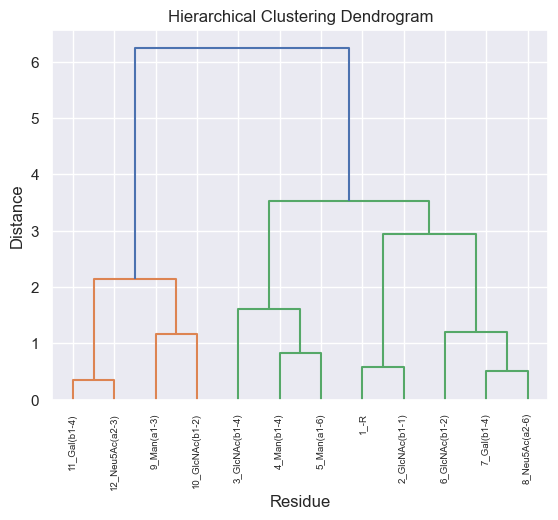

In [354]:
show_correlation_dendrogram(mx, font_size = 7)

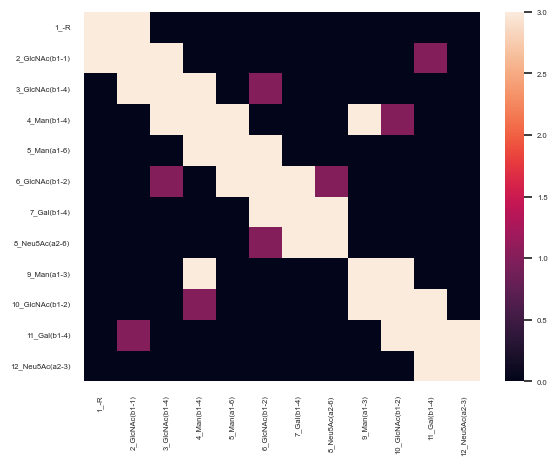

In [355]:
isft = inter_structure_frequency_table(dfs, threshold = 3)
monosaccharide_contact_map(isft)

## Pipeline idea: Analysis of a set of glycans from the same topological group --> make a dendrogram and extract clusters from these glycans
## --> save a dict named according to the glyco-silhouette and containing the different clusters as well as their content

# Investigation of failing glycans

In [375]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list() #1
for gly in g :
    print(gly)

Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)]Gal(b1-4)Glc


In [376]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list() #1
for gly in g :
    print(gly)


GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS
GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S
GalA(a1-4)GlcA(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc6S(a1-4)GlcA
GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S
Man(a1-2)GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)Glc
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS
GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc(a1-4)GlcA
GlcNS3S6S(a1-4)IdoA2S(a1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNAc3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)IdoA2S(a1-4)GlcNAc3S6S(a1-4)GlcA2S
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)G

In [92]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list() #1
for gly in g :
    print(gly)

Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl
Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc
GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b

In [ ]:
### Why these 3 are failing?
#Neu5Ac(a2-6)[GalNAc(a1-3)]GalNAc
#Neu5Gc(a2-8)Neu5Gc(a2-3)Gal(b1-4)Glc
#Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc --> la structure est complètement nimp sur Glycoshape, c'est pas moi le problème

In [60]:
def annotation_pipeline(pdb_file, glycan,threshold =2.7) :
  ### Huge function combining all smaller ones required to annotate a PDB file into IUPAC nomenclature, ensuring that the conversion is correct
  ### It allows also to determine if PDB to IUPAC conversion at the monosaccharide level works fine

  ### Extract glycan sequence from filename
  #glycan_sequence = get_glycan_sequence_from_path(pdb_file)
  glycan_sequence = glycan
  #print(glycan_sequence)

  ### Using glycowork, extract valid fragments (fragment = monolink like GlcNAc(b1-4))
  valid_fragments = [x.split(')')[0]+')' for x in link_find(glycan_sequence)]
  #print(valid_fragments)

  ### Detect binary connections (covalent linkages) using a maximal distance threshold and valid_fragments + build a mapping dictionnary
  res = extract_binary_interactions_from_PDB(pdb_file,threshold)
  mapping_dict, interaction_dict = create_mapping_dict_and_interactions(res,valid_fragments)
  #print(mapping_dict)
  #print(interaction_dict)
  #print(len(mapping_dict))
  #print(len(interaction_dict))

  ### Comparison of glycowork linkages and glycontact linkages to ensure correct extraction from PDB
  # Extract glycowork interactions:
  graph_output = glycan_to_graph(glycan_sequence)
  interactions_with_labels = extract_binary_glycowork_interactions(graph_output)
  #print(interactions_with_labels)

  # Extract glycontact interactions:
  result_list = extract_binary_glycontact_interactions(interaction_dict)
  #print("result list:" + str(result_list))
  # Compare glycowork IUPAC to graph versus glycontact PDB to graph to ensure glycontact detection of covalent linkages is correct (must return True)
  if glycowork_vs_glycontact_interactions(interactions_with_labels, result_list) == True :
    print("glycowork and glycontact agree on the list of covalent linkages")

    if check_reconstructed_interactions(interaction_dict) == True :
      print("Building a network from glycontact interactions generate a single molecule, as expected")

      ### When everything is validated: Annotation including correction of GalNAc annotated as GLC
      df = correct_dataframe(extract_3D_coordinates(pdb_file))
      result_df = annotate_pdb_data(df, mapping_dict)

    else :
      print("Although the fragments building binary interactions seem fine, some interactions are missed resulting in the reconstruction of multiple submolecules")
      return(pd.DataFrame())
  else :
    print("glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages")
    return(pd.DataFrame())
  return(result_df)

def explore_threshold(pdb_file, glycan, threshold_list=[2.2,2.4,2.5,2.6,2.7,2.8,2.9,2.25,2.45,2.55,2.65,2.75,2.85,2.95,3]):
  # Apply the annotation pipeline with different threshold, and return a correct df if found

  completed = False
  for x in threshold_list :
    print('threshold:' + str(x))
    res = annotation_pipeline(pdb_file,glycan,x)
    if len(res) != 0 :
      completed = True
      return(res)
  if completed == False :
    print('None of these thresholds allows to correctly annotate your PDB file:' + str(threshold_list))
    return(pd.DataFrame())
  


In [53]:
def extract_binary_interactions_from_PDB(coordinates_df, threshold):
    """
    Extract binary interactions between C1-2 atoms and oxygen atoms from a DataFrame.

    Parameters:
    - coordinates_df (pd.DataFrame): DataFrame obtained using extract_3D_coordinates.
    - threshold (float): Distance threshold for considering interactions.

    Returns:
    - pd.DataFrame: DataFrame with columns 'Atom', 'Column', and 'Value' representing interactions.
    """
    coordinates_df =  correct_dataframe(extract_3D_coordinates(pdb_file))
    carbon_1_2_df = coordinates_df[(coordinates_df['atom_name'] == 'C1') | (coordinates_df['atom_name'] == 'C2')]
    oxygen_df = coordinates_df[coordinates_df['element'] == 'O']

    c_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in carbon_1_2_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}
    o_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in oxygen_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}

    atom = []
    column = []
    value = []

    for c_key, c_coords in c_dict.items():
        smallest_distance = 1000
        closest_residue = ''
        c_resnum = c_key.split('_')[0]

        for o_key, o_coords in o_dict.items():
            o_resnum = o_key.split('_')[0]

            if c_resnum != o_resnum:
                sum_dist = np.sum(np.abs(np.array(c_coords) - np.array(o_coords)))

                if sum_dist < smallest_distance:
                    smallest_distance = sum_dist
                    closest_residue = o_key

        if smallest_distance < threshold:
            atom.append(c_key)
            column.append(closest_residue)
            value.append(smallest_distance)

    interactions_df = pd.DataFrame({'Atom': atom, 'Column': column, 'Value': value})
    return interactions_df

In [91]:
def create_mapping_dict_and_interactions(df, valid_fragments) :
  #df is an interaction dataframe as returned by extract_binary_interactions_from_PDB()
  # valid_fragments : obtained from glycowork to ensure that we only append valid monolinks into mapping dict
  mapping_dict = {}
  interaction_dict = {}
  interaction_dict2 = {}
  first_mono_list = df['Atom'].to_list()
  second_mono_list = df['Column'].to_list()
  mapping_dict['1_ROH']='-R'
  wrong_mannose = []
  individual_entities = []

  for m in range(0,len(first_mono_list)) :

    mono = first_mono_list[m].replace("_"+first_mono_list[m].split('_')[-1],'')
    second_mono = second_mono_list[m].replace("_"+second_mono_list[m].split('_')[-1],'')
    first_val = first_mono_list[m].split('_')[-1]
    first_val = extract_numbers(first_val)
    last_val = extract_numbers(second_mono_list[m].split('_')[-1])
    if mono not in individual_entities:
      individual_entities.append(mono)
    if second_mono not in individual_entities:
      individual_entities.append(second_mono)

    if mono.split('_')[1] + '(' + first_val + '-' + last_val + ')' == "MAN(1-4)":
      wrong_mannose.append(mono)

    if second_mono in wrong_mannose :
      second_mono = second_mono.split('_')[0]+"_BMA"

    if mono in wrong_mannose :
      mono = mono.split('_')[0]+"_BMA"
    mapped_to_check = PDB_to_IUPAC(mono) + first_val + '-' + last_val + ')'
    #print("mapped_to_check:" + str(mapped_to_check))

    if mapped_to_check in valid_fragments :
      mapping_dict[mono] = PDB_to_IUPAC(mono) + first_val + '-' + last_val + ')'
    if mapped_to_check == 'Man(a1-4)':
      mapping_dict[mono] = 'Man(b1-4)'
    if mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check == '-R' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
      mapping_dict[mono] = mapped_to_check


    if mono in interaction_dict :
      if second_mono not in interaction_dict[mono] :
        interaction_dict[mono].append(second_mono)
        interaction_dict2[mono] = [mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')']
        interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'] = [second_mono] #added but eventually wrong, make everything else fail later
    if mono not in interaction_dict :
      if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
        interaction_dict[mono] = [second_mono]
        interaction_dict2[mono] = [mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')']

      if mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')' in interaction_dict2 :
        if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
          interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'].append(second_mono)

      if mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')' not in interaction_dict2 :
        if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
          interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'] = [second_mono]

  return(mapping_dict, interaction_dict2)

In [90]:
def glycowork_vs_glycontact_interactions(glycowork_interactions, glycontact_interactions) :
  # Take two sets of binary interactions to compare them and return any difference other than GlcNAc-a1-1 and a1-1-R (only considered by glycontact)

  # Convert the lists to sets for easy comparison
  result_set = set(glycontact_interactions)
  interactions_set = set(glycowork_interactions)

  # Calculate the differences
  differences = result_set.symmetric_difference(interactions_set)

  # Convert the differences set back to a list of tuples
  differences_list = list(differences)

  # Pairs to be ignored because specific to glycontact
  ignore_pairs = {('GlcNAc', 'a1-1'), ('a1-1', ' '),('GlcNAc', 'b1-1'), ('b1-1', ' '), ('GalNAc', 'a1-1'), ('GalNAc', 'b1-1'), ('Glc', 'a1-1'), ('Glc', 'b1-1'), ('Rha', 'b1-1'), ('Rha', 'a1-1'), ('Neu5Ac', 'b1-1'), ('Neu5Ac', 'a1-1'), ('Man', 'b1-1'), ('Man', 'a1-1'), ('Gal', 'b1-1'), ('Gal', 'a1-1'), ('Fuc', 'b1-1'), ('Fuc', 'a1-1'), ('Xyl', 'b1-1'), ('Xyl', 'a1-1'), ('GlcA', 'a1-1'), ('GlcA', 'b1-1')}

  # Filter out pairs to be ignored
  filtered_differences = [pair for pair in differences_list if pair not in ignore_pairs]

  # Print or use the filtered_differences as needed
  #print("Filtered Differences:", filtered_differences)
  if filtered_differences == [] and  (len(glycontact_interactions) > len(glycowork_interactions)):
    return(True)
  else :
    if filtered_differences != [] :
      #print('Differences in annotations')
      #print(glycowork_interactions)
      #print(glycontact_interactions)
      return(False)
    if (len(glycontact_interactions) <= len(glycowork_interactions)) :
      #print("Missing monosaccharide in mapping_dict")
      return(False)

In [54]:
def correct_dataframe(df):
  #Correct an annotated dataframe, transforming unexpected GLC into GalNAc based on the number of C atom they contain
  ### WARNING: this is a modified version of the function, assuming that it is always GalNAc(b which is wrong, which might be a wrong assomption
  resnum = list(set(df['residue_number'].tolist()))

  #Correcting GLC to GalNAc
  for x in resnum:
    #Correcting GLC to GalNAc
    condition = (df['monosaccharide'] == 'GLC') & (df['residue_number'] == x) & (df[(df['residue_number'] == x) & (df['element'] == 'C')]['element'].count() >= 7)

    if condition.any():
        print(len(df[df['residue_number'] == x]))
        df.loc[condition, 'monosaccharide'] = df.loc[condition, 'monosaccharide'].map(lambda x: x.replace('GLC', 'NGA'))

  return df

In [101]:
glycan = "Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac"

#successfull glycan : Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

pdb_path = "glycans_pdb/"+glycan
pdbs = check_available_pdb(pdb_path)

pdb_file = pdb_path + "/" + pdbs[0]
print(pdb_file)
df = explore_threshold(pdb_file, glycan, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
  

glycans_pdb/Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac/Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac_alpha_6.pdb
threshold:2.4
['Neu5Ac(a2-9)']
{'1_ROH': '-R', '3_SIA': 'Neu5Ac(a2-9)', '4_SIA': 'Neu5Ac(a2-9)', '5_SIA': 'Neu5Ac(a2-9)', '6_SIA': 'Neu5Ac(a2-9)'}
{'3_SIA': ['3_(a2-9)'], '3_(a2-9)': ['2_SIA'], '4_SIA': ['4_(a2-9)'], '4_(a2-9)': ['3_SIA'], '5_SIA': ['5_(a2-9)'], '5_(a2-9)': ['4_SIA'], '6_SIA': ['6_(a2-9)'], '6_(a2-9)': ['5_SIA']}
5
8
[('Neu5Ac', 'a2-9'), ('a2-9', 'Neu5Ac'), ('Neu5Ac', 'a2-9'), ('a2-9', 'Neu5Ac'), ('Neu5Ac', 'a2-9'), ('a2-9', 'Neu5Ac'), ('Neu5Ac', 'a2-9'), ('a2-9', 'Neu5Ac')]
result list:[('Neu5Ac', 'a2-9'), ('a2-9', 'Neu5Ac'), ('Neu5Ac', 'a2-9'), ('a2-9', 'Neu5Ac'), ('Neu5Ac', 'a2-9'), ('a2-9', 'Neu5Ac'), ('Neu5Ac', 'a2-9'), ('a2-9', 'Neu5Ac')]
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkage

In [440]:
mono = df['monosaccharide'].to_list()
IUPAC = df['IUPAC'].to_list()

for x in range(0,len(mono)):
    print(mono[x],IUPAC[x])

ROH -R
ROH -R
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu

In [76]:
print(df['atom_number'][0])

1


In [43]:
df2 = extract_3D_coordinates(pdb_file)

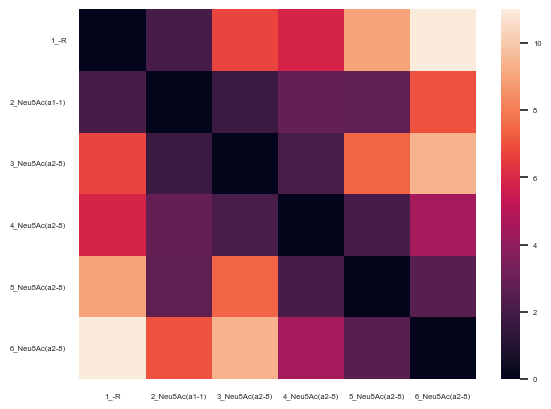

In [77]:
dist_table = make_monosaccharide_contact_table(df,mode='distance')
monosaccharide_contact_map(dist_table)